In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, SimpleExpSmoothing

raw_data = pd.read_csv('./datasets/TSLA.csv')
raw_data.head()

df = raw_data.loc[:,['Date', 'Close']]
df.head()

X = df

train_size = int(len(X) * 0.80)

X_train, X_test = X[0:train_size], X[train_size:len(X)]


X_train.shape

(606, 2)

In [6]:
holt_model = Holt(X_train['Close'])
simple_exp_model = SimpleExpSmoothing(X_train['Close'])

holt_model_fit= holt_model.fit()
simple_exp_model_fit = simple_exp_model.fit()


In [9]:
predict_holt_model = holt_model_fit.forecast(len(X_test['Close']))
predict_simple_exp_model = simple_exp_model_fit.forecast(len(X_test['Close']))

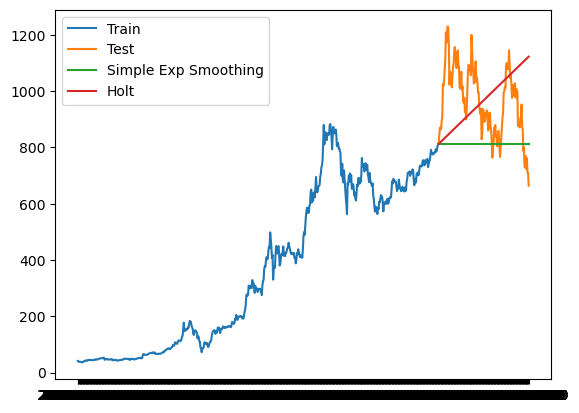

In [15]:
plt.plot(X_train['Date'], X_train['Close'], label = 'Train')
plt.plot(X_test['Date'], X_test['Close'], label = 'Test')
plt.plot(X_test['Date'], predict_simple_exp_model, label = 'Simple Exp Smoothing')
plt.plot(X_test['Date'], predict_holt_model, label = 'Holt')
plt.legend(loc= 'upper left')
